## RiverCast

### Import Libraries and Datasets

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
# import dataset
df = pd.read_csv('dataset.csv')
df.dropna(inplace=True)
df.head(10)

,Station,Year,Month,Day,Hour,Waterlevel,Station.1,Year.1,Month.1,Day.1,...,RF-Intensity.1,Humidity,Precipitation,Temperature,Temperature.1,Humidity.1,Precipitation.1,Temperature.2,Humidity.2,Precipitation.2
0,NANGKA,2012,January,1,1,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
1,NANGKA,2012,January,1,2,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
2,NANGKA,2012,January,1,3,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
3,NANGKA,2012,January,1,4,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
4,NANGKA,2012,January,1,5,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
5,NANGKA,2012,January,1,6,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
6,NANGKA,2012,January,1,7,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
7,NANGKA,2012,January,1,8,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
8,NANGKA,2012,January,1,9,15.86,STO.NINO,2012,January,1,...,0.0,17.64,0.01,26.20,26.20,17.64,0.01,26.20,17.64,0.01
9,NANGKA,2012,January,1,10,15.86,STO.NINO,2012,January,1,...,0.0,17.27,0.02,27.55,27.55,17.27,0.02,27.55,17.27,0.02


In [3]:
# remove non numeric fields
df = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3', 'RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
df = df.astype(np.float64)
df.head(10)

,Waterlevel,Waterlevel.1,Waterlevel.2,Waterlevel.3,RF-Intensity,RF-Intensity.1,Temperature,Temperature.1,Temperature.2,Humidity,Humidity.1,Humidity.2,Precipitation,Precipitation.1,Precipitation.2
0,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
1,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
2,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
3,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
4,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
5,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
6,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
7,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
8,15.86,12.53,12.53,21.97,0.0,0.0,26.20,26.20,26.20,17.64,17.64,17.64,0.01,0.01,0.01
9,15.86,12.53,12.53,21.97,0.0,0.0,27.55,27.55,27.55,17.27,17.27,17.27,0.02,0.02,0.02


### Clean Dataset

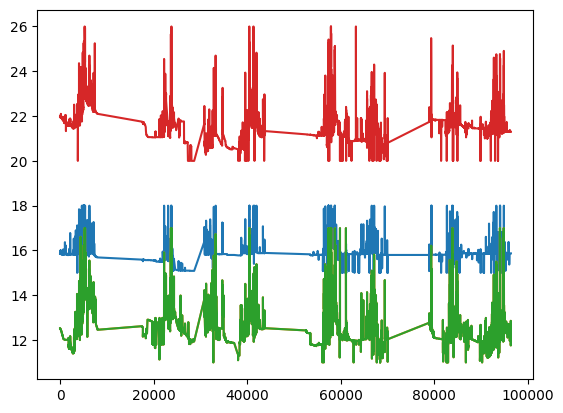

In [4]:
# remove water data outliers
df['Waterlevel'] = df['Waterlevel'].clip(upper=18, lower=15, axis=0)
df['Waterlevel.1'] = df['Waterlevel.1'].clip(upper=17, lower=11, axis=0)
df['Waterlevel.2'] = df['Waterlevel.2'].clip(upper=17, lower=11, axis=0)
df['Waterlevel.3'] = df['Waterlevel.3'].clip(upper=26, lower=20, axis=0)

water_data = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3']]
plt.plot(water_data)

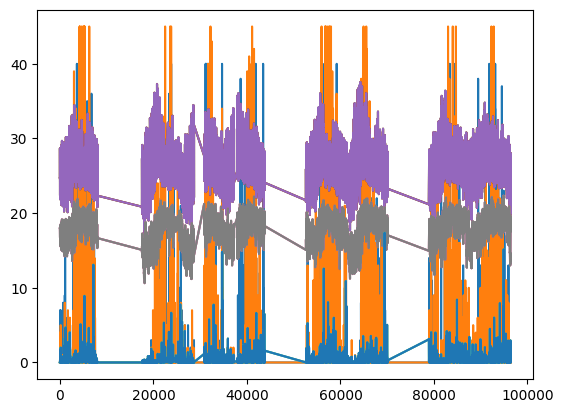

In [5]:
# remove weather data outliers
df['RF-Intensity'] = df['RF-Intensity'].clip(upper=40, lower=0, axis=0)
df['RF-Intensity.1'] = df['RF-Intensity.1'].clip(upper=45, lower=0, axis=0)
df[['Precipitation', 'Precipitation.1', 'Precipitation.2']] = df[['Precipitation', 'Precipitation.1', 'Precipitation.2']].clip(upper=20, lower=0, axis=0)

weather_data = df[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
plt.plot(weather_data)

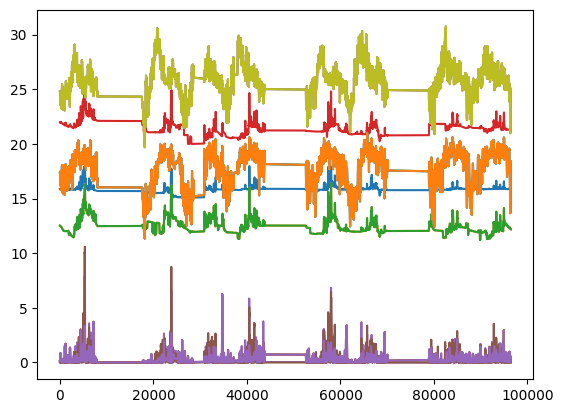

In [6]:
# smoothen time-series using moving average
df = df.rolling(window=48).mean().bfill().ffill()
plt.plot(df)

### Principal Component Analysis

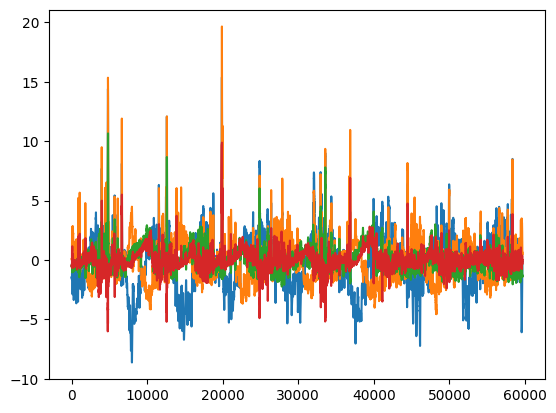

In [7]:
# reduce weather data

# standardize the data
scaled_data = (df - df.mean()) / df.std()

# convert to weather data to numpy
weather_data = scaled_data[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1', 'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']].to_numpy()

# compute covariance matrix
weather_cov_matrix = np.cov(weather_data, ddof=0, rowvar=False)

# compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(weather_cov_matrix)
order_of_importance = np.argsort(eigenvalues)[::-1] 

# sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance]
sorted_eigenvectors = eigenvectors[:,order_of_importance]

k = 4  # number of features to preserve
reduced_weather_data = np.matmul(weather_data, sorted_eigenvectors[:,:k]) # transform the original data
plt.plot(reduced_weather_data)

### Normalized Dataset

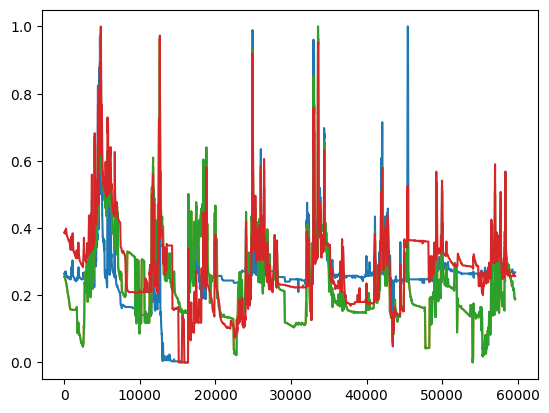

In [8]:
# normalize water data
water_scaler = MinMaxScaler()
water_data = scaled_data[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3']]
water_data = water_scaler.fit_transform(water_data)
plt.plot(water_data)

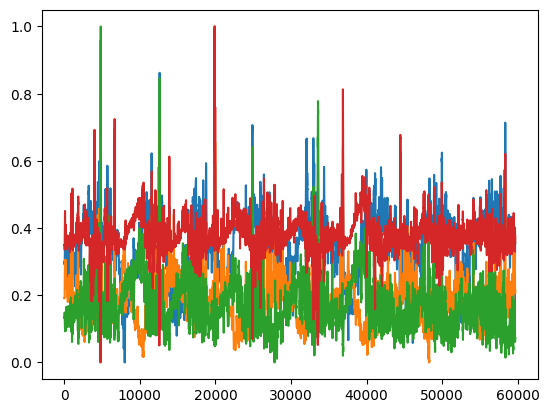

In [9]:
# normalize weather data
weather_scaler = MinMaxScaler()
weather_data = weather_scaler.fit_transform(reduced_weather_data)
plt.plot(weather_data)

### Prepare Training Batches

In [10]:
# utilize rolling window to generate dataset
MAX_TOKENS = 168
window_size = MAX_TOKENS
window_step = 6
series_len = len(weather_data) - window_size

weather_windows = np.array([weather_data[i:(i + window_size)] for i in range(0, series_len, window_step)])
print(weather_windows.shape)

water_windows = np.array([water_data[i:(i + window_size)] for i in range(0, series_len, window_step)])
print(water_windows.shape)

(9915, 168, 4)
(9915, 168, 4)


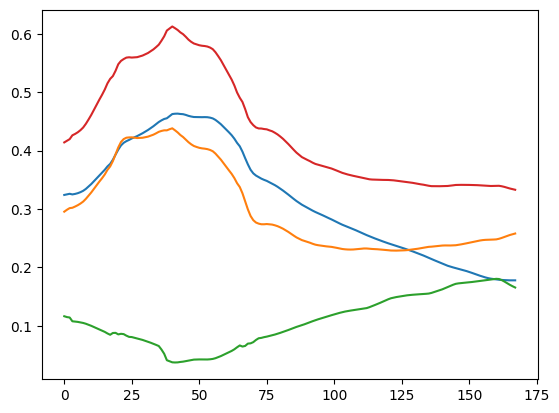

In [11]:
plt.plot(weather_windows[2310])

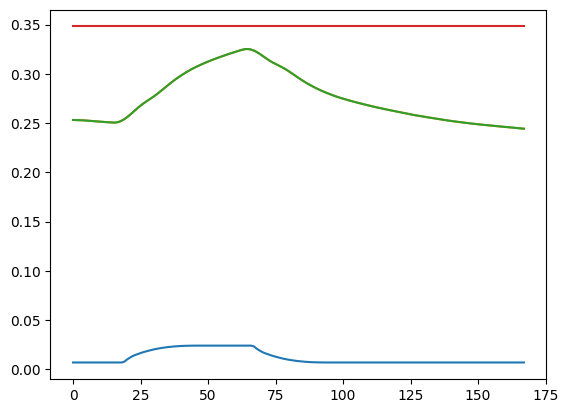

In [12]:
plt.plot(water_windows[2310])

In [13]:
# training dataset
X_train = weather_windows[:6940]
Y_train = water_windows[:6940]

print(X_train.shape)
print(Y_train.shape)

# validation dataset
X_val = weather_windows[6940:8425]
Y_val = water_windows[6940:8425]

print(X_val.shape)
print(Y_val.shape)

# testing dataset
X_test = weather_windows[8425:]
Y_test = water_windows[8425:]

print(X_test.shape)
print(Y_test.shape)

(6940, 168, 4)
(6940, 168, 4)
(1485, 168, 4)
(1485, 168, 4)
(1490, 168, 4)
(1490, 168, 4)


### Build the Model

In [14]:
# Positional Encoding
def positional_encoding(length, depth):
    depth = depth / 2
    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate(
        [np.sin(angle_rads), np.cos(angle_rads)],
        axis=-1) 

    return tf.cast(pos_encoding, dtype=tf.float32)


class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, d_model):
        super().__init__()
        self.d_model = d_model
        self.pos_encoding = positional_encoding(length=2048, depth=d_model)

    def call(self, x):
        length = tf.shape(x)[1]
        # This factor sets the relative scale of the positional encoding.
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = x + self.pos_encoding[tf.newaxis, :length, :]
        return x

In [15]:
# Attention Layers

class BaseAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()
    
class GlobalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x

In [16]:
# Feed Forward Layer

class FeedForward(tf.keras.layers.Layer):
    def __init__(self, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.seq = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='sigmoid'),
            tf.keras.layers.Dense(d_model, 'sigmoid'),
            tf.keras.layers.Dropout(dropout_rate)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, x):
        x = self.add([x, self.seq(x)])
        x = self.layer_norm(x) 
        return x

In [17]:
# Encoder Layer

class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self,*, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.self_attention = GlobalSelfAttention(
            num_heads=1,
            key_dim=d_model,
            dropout=dropout_rate)
        self.ffn = FeedForward(d_model, dff)

    def call(self, x):
        x = self.self_attention(x)
        x = self.ffn(x)
        return x
    
class Encoder(tf.keras.layers.Layer):
    def __init__(self, *, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.d_model = d_model
        self.pos_embedding = PositionalEmbedding(d_model=d_model)
        self.enc_layer = EncoderLayer(d_model=d_model, dff=dff, dropout_rate=dropout_rate)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x):
        # `x` is token-IDs shape: (batch, seq_len)
        x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.
        # Add dropout.
        x = self.dropout(x)
        x = self.enc_layer(x)
        return x  # Shape `(batch_size, seq_len, d_model)`.

In [18]:
# Transformer Model

class Transformer(tf.keras.Model):
    def __init__(self, *, d_model, dff, target_output_size, dropout_rate=0.1):
        super().__init__()
        self.encoder = Encoder(d_model=d_model, dff=dff, dropout_rate=dropout_rate)
        self.final_layer = tf.keras.layers.Dense(target_output_size, activation='sigmoid')

    def call(self, x):
        x = self.encoder(x)  # (batch_size, target_len, d_model)

        # Final linear layer output.
        logits = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

        try:
            # Drop the keras mask, so it doesn't scale the losses/metrics.
            # b/250038731
            del logits._keras_mask
        except AttributeError:
            pass

        # Return the final output and the attention weights.
        return logits

In [19]:
transformer = Transformer(d_model=4, dff=512, target_output_size=4)

output = transformer(X_test)
output.shape

TensorShape([1490, 168, 4])

In [20]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  4708      
                                                                 
 dense_2 (Dense)             multiple                  20        
                                                                 
Total params: 4728 (18.47 KB)
Trainable params: 4728 (18.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
import keras 

callback = keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=3)

transformer.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.MeanAbsoluteError()])

transformer.fit(x=X_train, y=Y_train, batch_size=720, epochs=100, validation_data=(X_val, Y_val), callbacks=[callback])

Epoch 1/100
10/10 [==============================] - 13s 1s/step - loss: 0.0850 - mean_absolute_error: 0.2451 - val_loss: 0.0595 - val_mean_absolute_error: 0.2049
Epoch 2/100
10/10 [==============================] - 10s 1s/step - loss: 0.0630 - mean_absolute_error: 0.2068 - val_loss: 0.0482 - val_mean_absolute_error: 0.1826
Epoch 3/100
10/10 [==============================] - 10s 998ms/step - loss: 0.0558 - mean_absolute_error: 0.1937 - val_loss: 0.0420 - val_mean_absolute_error: 0.1693
Epoch 4/100
10/10 [==============================] - 10s 991ms/step - loss: 0.0506 - mean_absolute_error: 0.1837 - val_loss: 0.0371 - val_mean_absolute_error: 0.1579
Epoch 5/100
10/10 [==============================] - 10s 998ms/step - loss: 0.0462 - mean_absolute_error: 0.1748 - val_loss: 0.0330 - val_mean_absolute_error: 0.1478
Epoch 6/100
10/10 [==============================] - 10s 999ms/step - loss: 0.0424 - mean_absolute_error: 0.1668 - val_loss: 0.0295 - val_mean_absolute_error: 0.1387
Epoch 7/10

In [22]:
# measure accuracy
from sklearn.metrics import mean_absolute_error

pred = transformer.predict(X_test, verbose=None)
mean_absolute_error(y_true=np.reshape(Y_test, (-1, 4)), y_pred=np.reshape(pred, (-1, 4)))

0.06159833464396086

In [39]:
def make_predictions(index):
    sample = X_test[index]
    plt.plot(sample)
    y_pred = transformer.predict(x=np.array([sample]), verbose=None)
    plt.plot(y_pred[0])
    

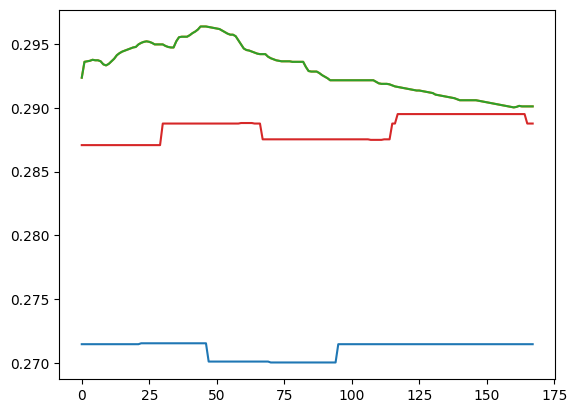

In [45]:
plt.plot(Y_test[180])

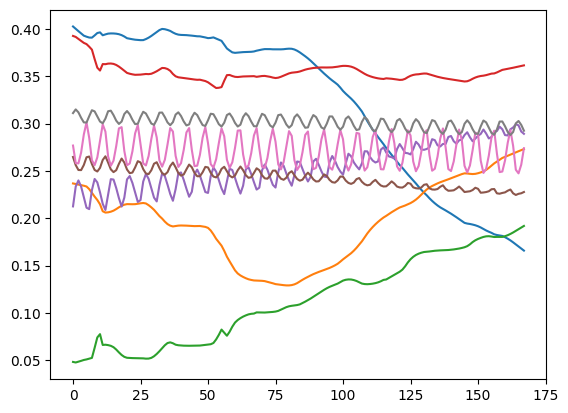

In [48]:
make_predictions(180)

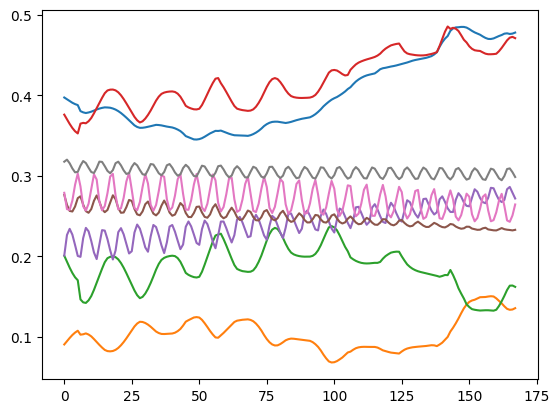

In [50]:
make_predictions(720)